## Univariate time series vs Multivariate time series

Univariate time series - single value at each time step

Multivariate time series - multiple values at each time step <br>
eg. Birthrate and death rate in a country,
CO2 concentration vs Temperature over time,
(X, Y) coordinates of a moving car

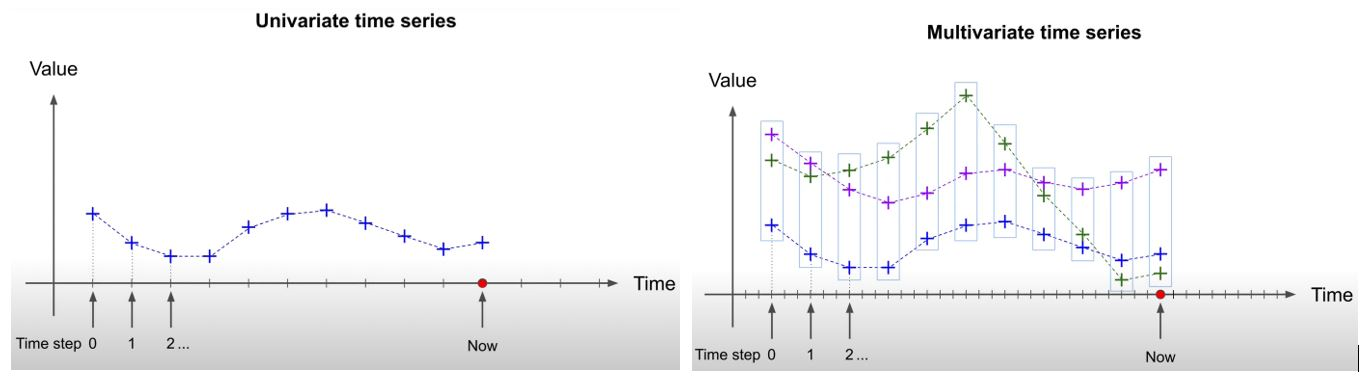

## Common Patters

- Trend (Upward or downward trend)
- Seasonality (Patterns repeat at predictable intervals)
- Noise (Generated by picking up a random number at each step - Completely unpredictable) <br>
Try to identify the probability distribution and find its parameters. You can do this by plotting a histogram of all the values. (forcast the mean maybe) <br>
Also, in real life noise is often auto-corelated, it depends on previous values a few steps before that. (Not covered in this course)

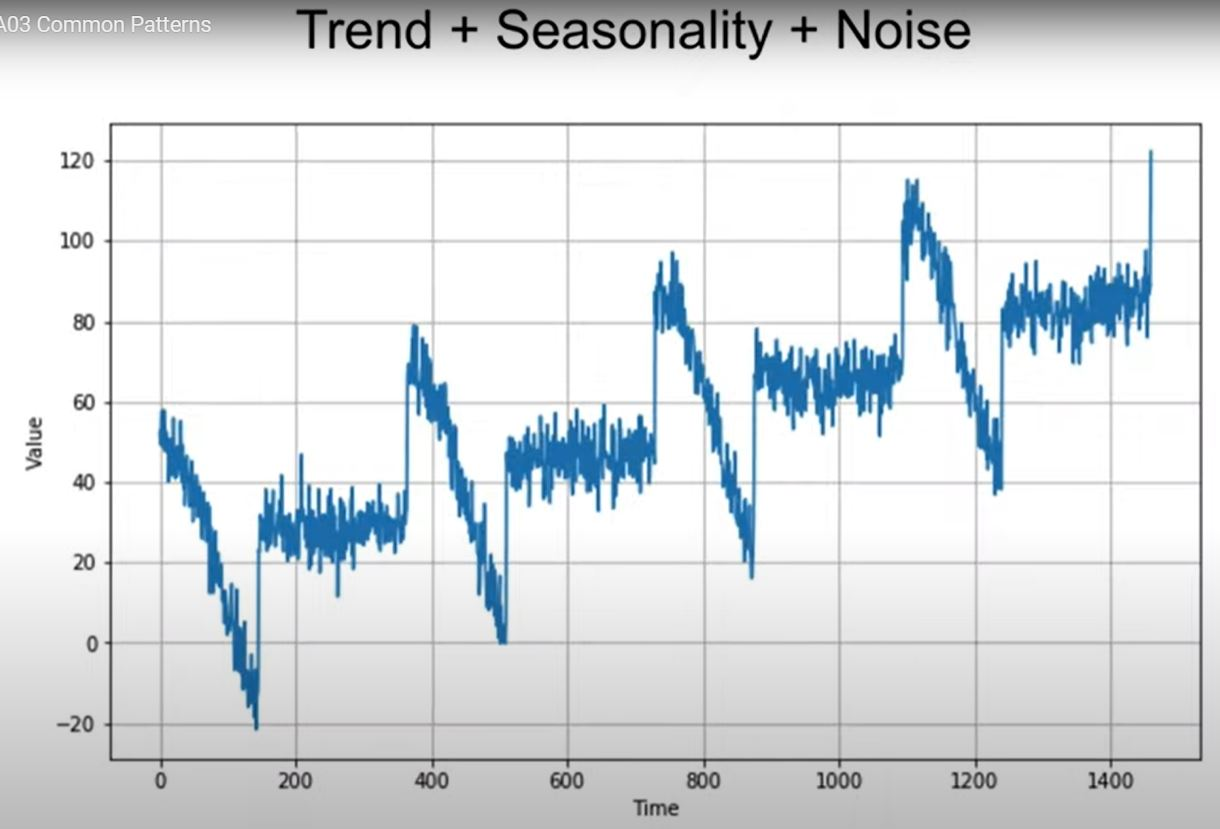

## Naive Forecasting 

The simplest approach could be that you take the last value and assume that the next value will be the same. Extremely good as a baseline model. 

How do you measure performance - By partitioning. <br>
In general, when you are doing these partitions you would want to ensure that each partition has a whole number of season. <br>
Eg. If the time series has a yearly seasonality then you would want to ensure that each period contains a whole number of seasons. then 1 year, or 2 years, or 3 years, etc <br>
1.5 years is not a great idea as some months will be represented more than others. 

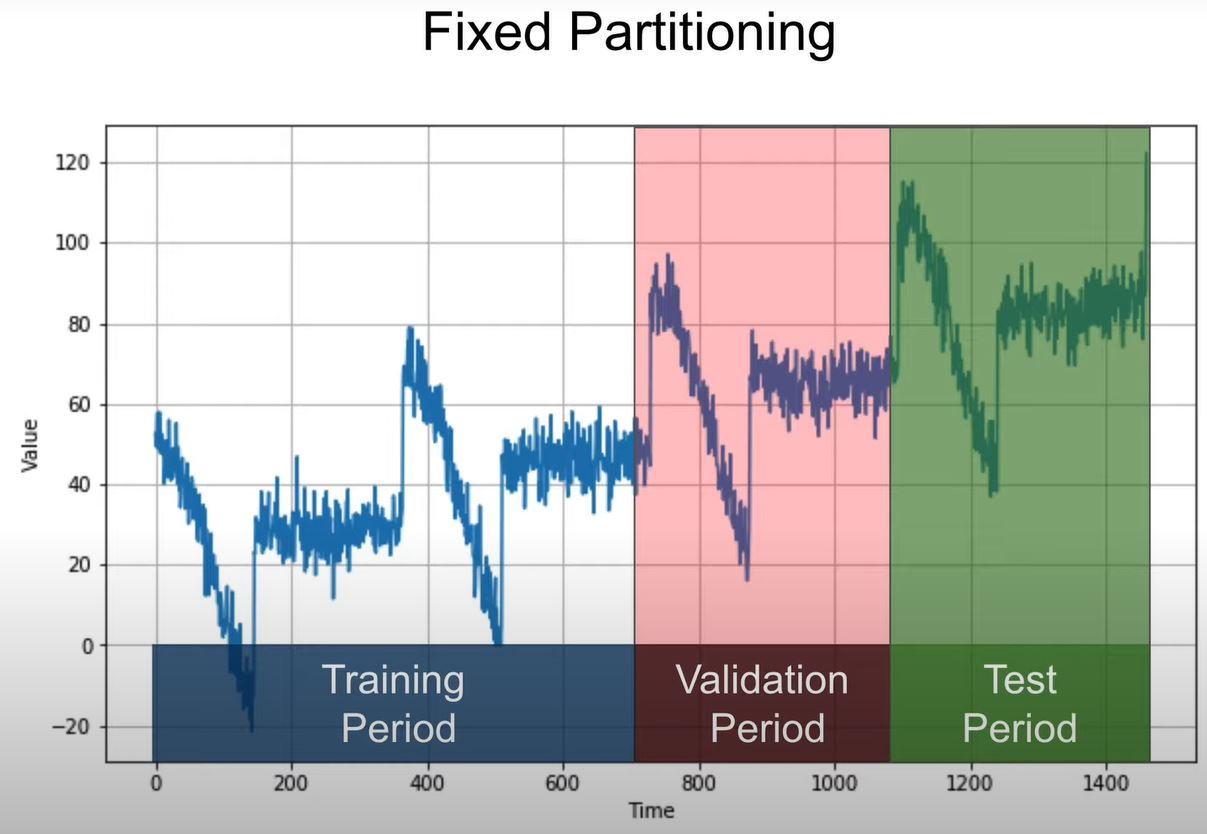

**Step 1. Get the best model:** Train your model in the training period and then you evaluate it on the validation period. Itterate to get the best model architecture and tune your hyperparameters until you get your desired performance. <br> 
**Step 2. Get the prediction estimate:** After that, you train your best model on training + validation period, then evaluate at the test period to get an idea of how your model will perform in production. 
**Step 3: Prepare final model:** Retrain your model last time, on the full data (including the Test Period) to get the Final model which should be deployed. 


In usual machine learnig practice we never train our models on the test period. But in this case we will be doing that because we need the most recent data to predict the values most accurately. Most reacent values are most important for prediction. 

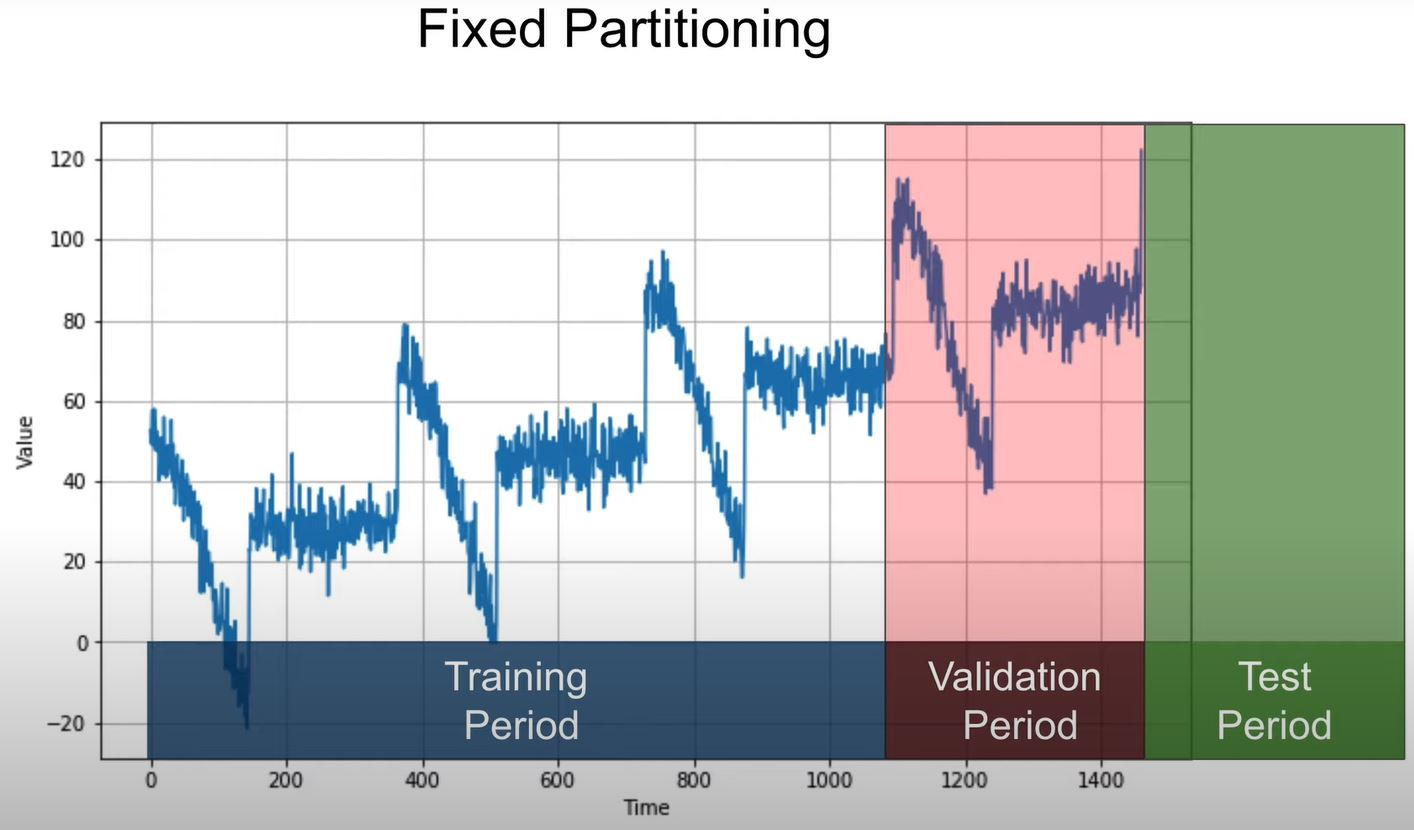

Since, the test set is not as reliable measure of the performance of our model and we need that for training before deploying our model. It is common to just use training period and validation period. So, test period is in the future. **We will do this for this course**

## Roll-Forward Partitioning 

We start with a section of the traiing period and then we gradually increase it by (let's say) 1 week at a time. At each itteration we train the model on the training period and we use it to forecast the following the following week. This is called **roll-forward partitioning**.

Drawback - It required much more training time. <br>
Advantage - It mimics the production conditions more accurately. Since you generally want to retrain your model regularly as you get more training data. 

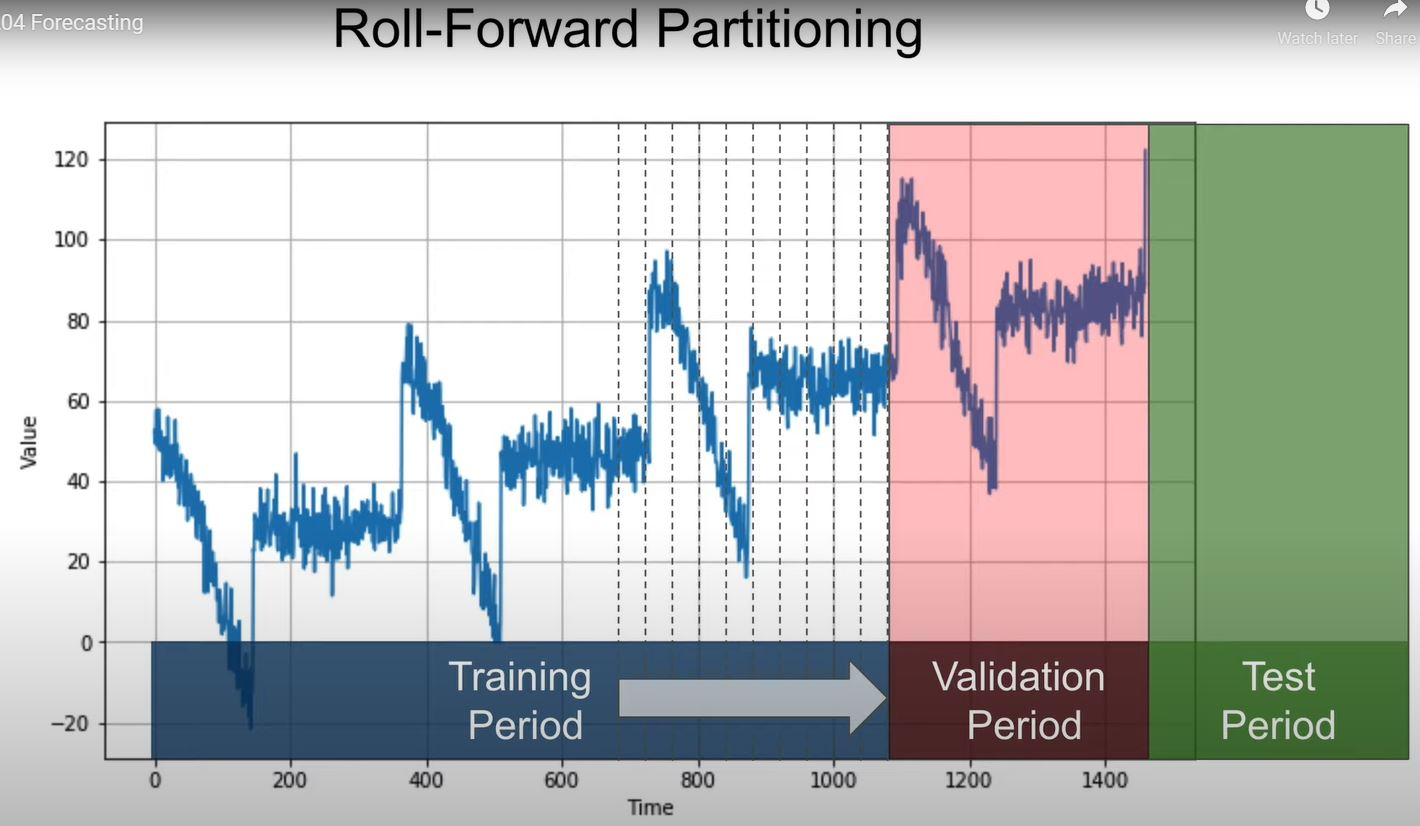

However, for simplicity we will use fixed partitioning for this course. 

# Metrics for evaluation of a model

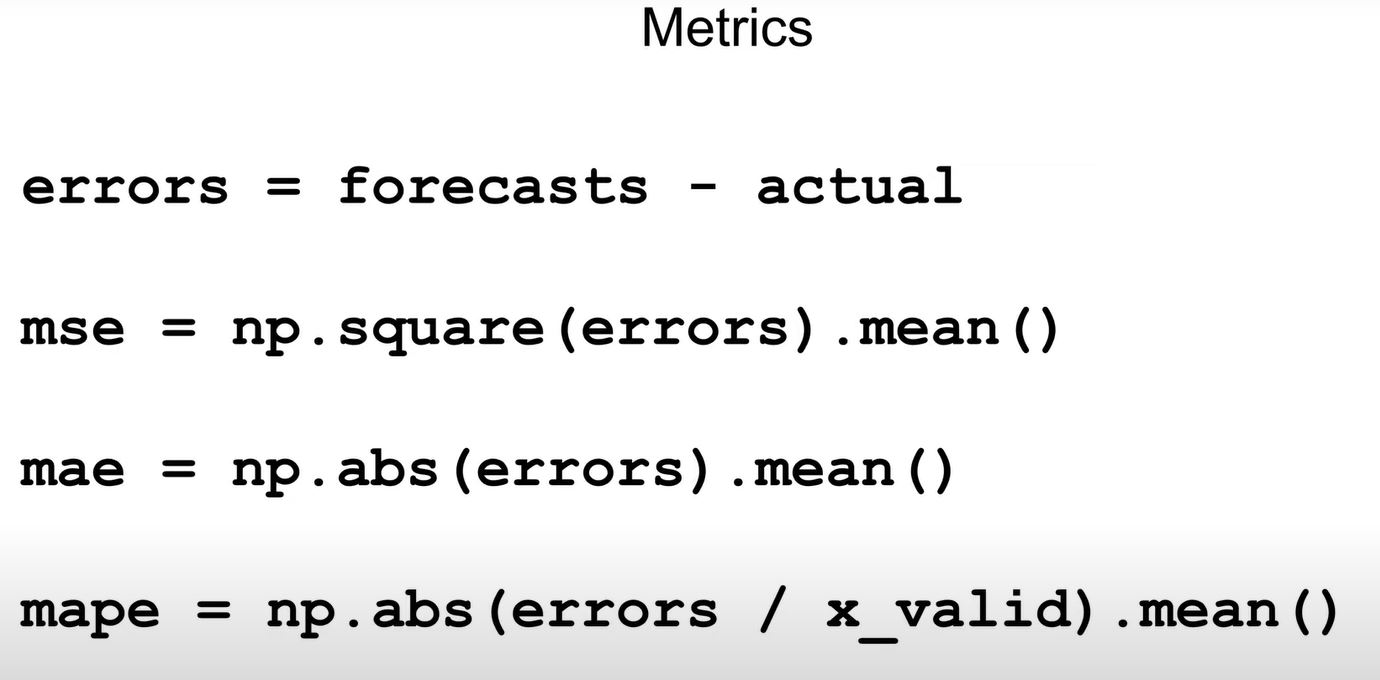



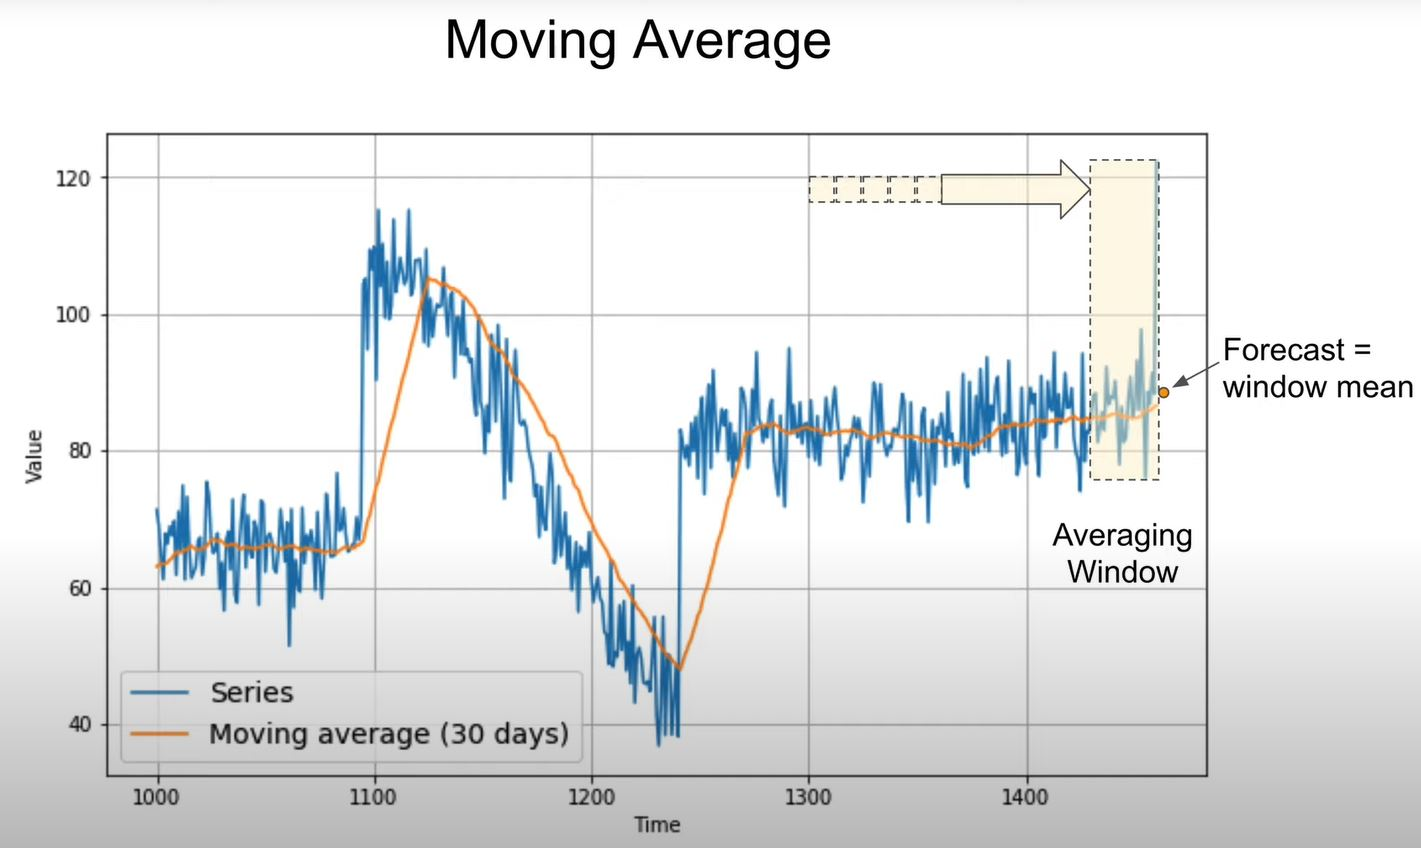

Moving Average = average of the last few values <br>
This does not account for trend or seasonality, so it performs worse than naive (MAE = 7.14)

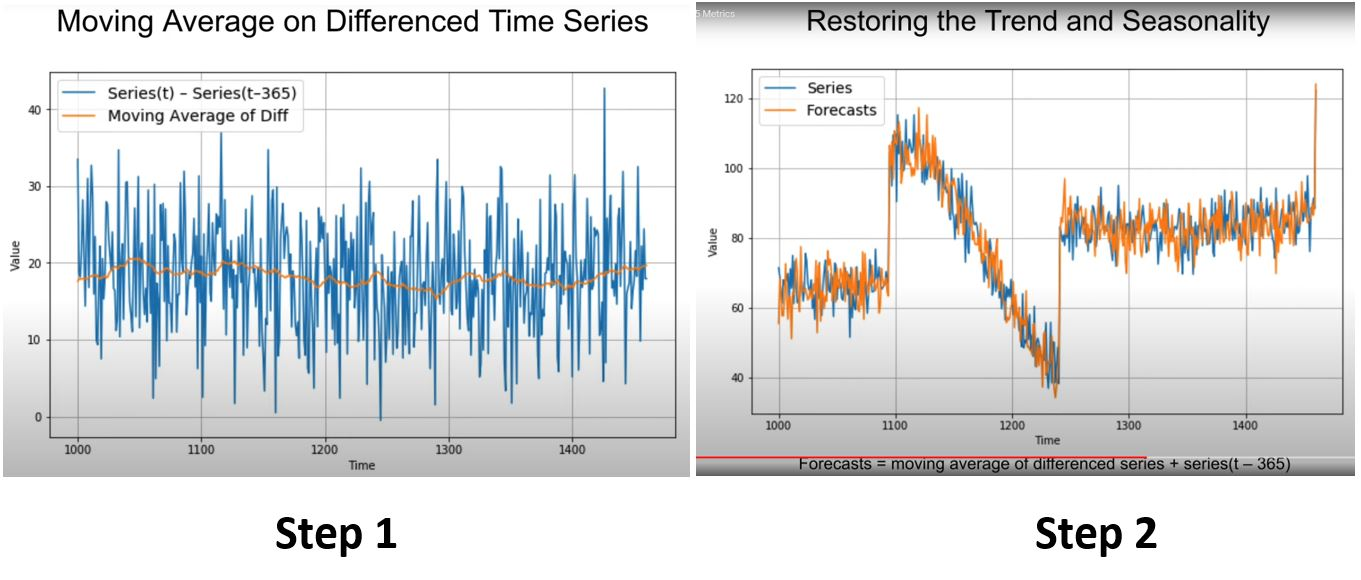



To fix the MA method, we could removed the trend and seasonality and thenforecast and then add the trend and seasonality to get the final prediction.  <br>
Step 1: Series(t) - Series(t - 365) ### This removes TREND + SEASONALITY, so, Only Noise is left <br>
    diff = Series(t) - Series(t - 365) <br>
Step 2: Moving average of diff 
    
Forecasts = moving average of differenced series + series(t-365) <br>
Now, we have slightly better performance than Naive forecasts (MAE = 5.8)

We can improve this model by removing the past noise from the series(t - 365)

## Step 3
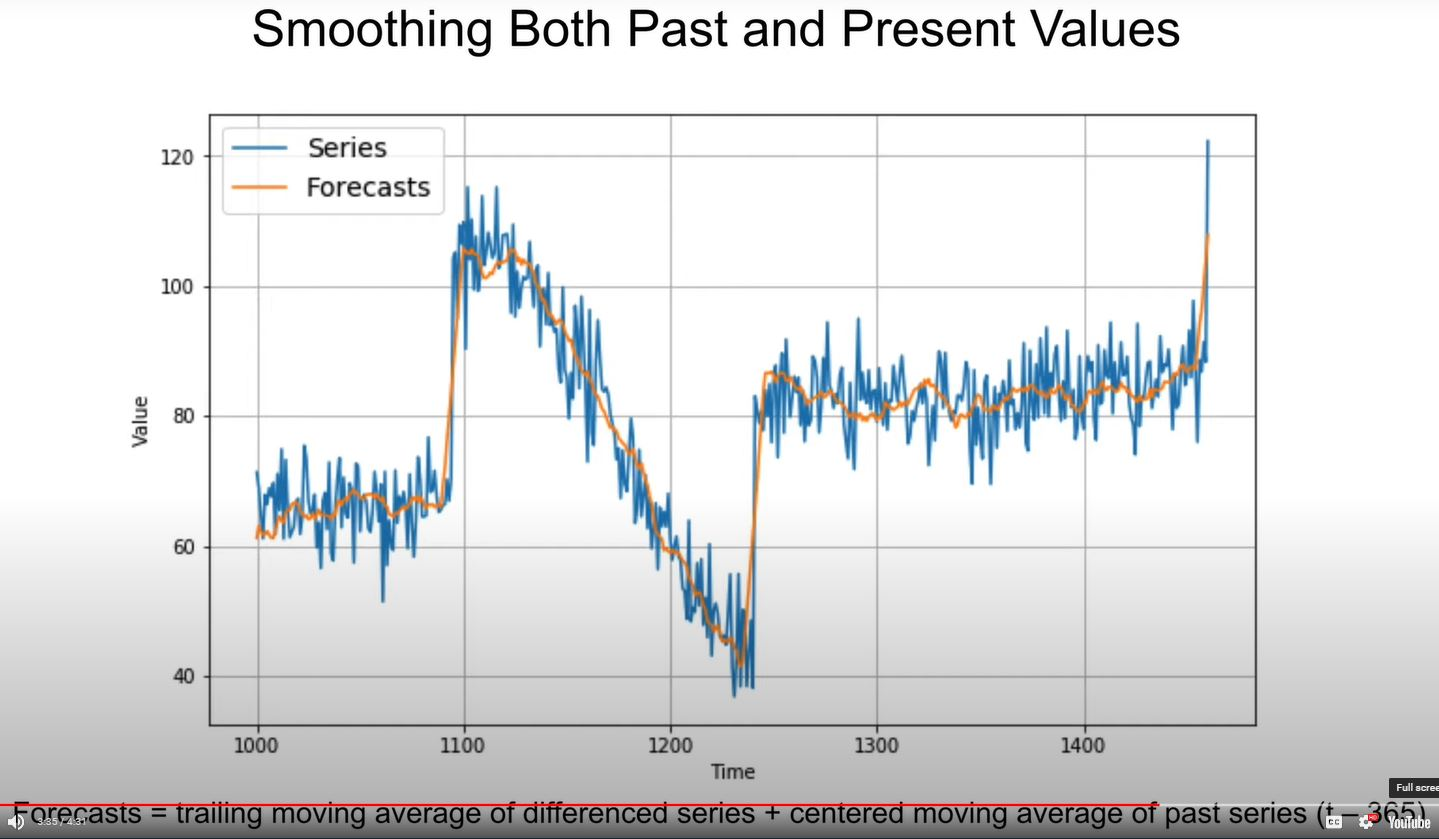

Berst model so far. MAE = 4.5